In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display

meta = pd.read_csv("../birdclef-2022-data/train_metadata.csv")

base_path = '../birdclef-2022-data/train_audio/'
audio_name = '../birdclef-2022-data/train_audio/afrsil1/XC125458.ogg'
image_directory = '../birdclef-2022-data/train_images/'
hop_length = 512
window_size = 1024


In [ ]:
y, sr = librosa.load(audio_name)
window = np.hanning(window_size)
out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length,
       window=window)
out = 2 * np.abs(out) / np.sum(window)

librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max),
               y_axis='log', x_axis='time')

In [28]:
import skimage.io

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                            n_fft=hop_length*2, hop_length=hop_length)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    return img

    # save as PNG
    #skimage.io.imsave(out, img)

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def load_batch_spectograms(audio_names):
    storage = []
    for entry in audio_names:
        y, sr = librosa.load(base_path + entry)
        spec = spectrogram_image(y, sr, entry[:-4], hop_length, 256)
        storage.append(spec)
    return storage

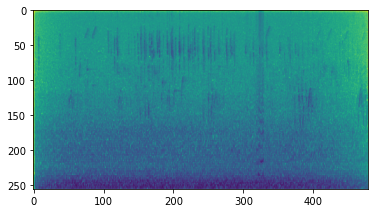

In [13]:
spec = spectrogram_image(y, sr, hop_length, 256)
plt.imshow(spec)

In [29]:
counter = 0
names = meta['filename']
first_batch = names[counter:(counter + 100)]


training_batch = load_batch_spectograms(first_batch)

print(len(training_batch))

100
